In [18]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import calplot
from datetime import datetime

In [25]:
# Reading Step count data from both mifit and google fit
StepCount = {}

# mifit data
with open("/home/mzfr/dev/chess-data/fit/mifit/ACTIVITY/ACTIVITY_1605643103723.csv", "r") as f:
    data = csv.DictReader(f)
    for activity in data:
        date = datetime.strptime(activity["\ufeffdate"], "%Y-%m-%d")
        if date.year != 2020:
            continue
        StepCount[date] = int(activity["steps"])

# Google Fit data
with open("/home/mzfr/dev/chess-data/fit/Fit/Daily Aggregations/Daily Summaries.csv", "r") as f:
    data = csv.DictReader(f)
    for summary in data:
        date = datetime.strptime(summary["Date"], "%Y-%m-%d")
        if date.year != 2020: # Keeping data just for 2020
            continue
        if date not in StepCount:
            try:
                StepCount[date] = int(summary["Step count"])
            except ValueError:
                print(date)

{datetime.datetime(2020, 1, 1, 0, 0): 11110, datetime.datetime(2020, 1, 2, 0, 0): 582, datetime.datetime(2020, 1, 3, 0, 0): 4213, datetime.datetime(2020, 1, 4, 0, 0): 1919, datetime.datetime(2020, 1, 5, 0, 0): 5601, datetime.datetime(2020, 1, 6, 0, 0): 8231, datetime.datetime(2020, 1, 7, 0, 0): 6797, datetime.datetime(2020, 1, 8, 0, 0): 1279, datetime.datetime(2020, 1, 9, 0, 0): 5662, datetime.datetime(2020, 1, 10, 0, 0): 2731, datetime.datetime(2020, 1, 11, 0, 0): 1065, datetime.datetime(2020, 1, 12, 0, 0): 12078, datetime.datetime(2020, 1, 13, 0, 0): 2287, datetime.datetime(2020, 1, 14, 0, 0): 1424, datetime.datetime(2020, 1, 15, 0, 0): 3551, datetime.datetime(2020, 1, 16, 0, 0): 8630, datetime.datetime(2020, 1, 17, 0, 0): 2557, datetime.datetime(2020, 1, 18, 0, 0): 2694, datetime.datetime(2020, 1, 19, 0, 0): 2832, datetime.datetime(2020, 1, 20, 0, 0): 7695, datetime.datetime(2020, 1, 21, 0, 0): 1384, datetime.datetime(2020, 1, 22, 0, 0): 6467, datetime.datetime(2020, 1, 23, 0, 0): 5

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2020'>], dtype=object))

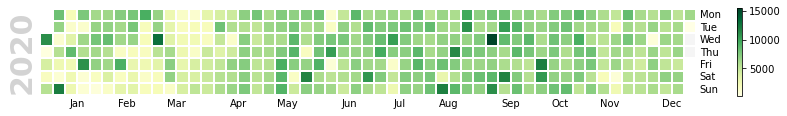

In [44]:
series = pd.Series(StepCount)
calplot.calplot(series, cmap='YlGn', edgecolor=None)

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2020'>], dtype=object))

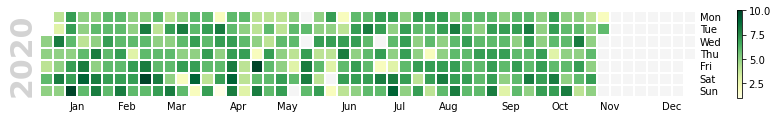

In [48]:
SleepTime = {}
## Sleep data from MiFit

with open("/home/mzfr/dev/chess-data/fit/mifit/SLEEP/SLEEP_1605643104941.csv", "r") as f:
    data = csv.DictReader(f)
    for sleep in data:
        date = datetime.strptime(sleep["\ufeffdate"], "%Y-%m-%d")
        if date.year == 2020:
            start = datetime.fromtimestamp(int(sleep["start"]))
            stop = datetime.fromtimestamp(int(sleep["stop"]))
            total = stop-start
            SleepTime[date] = total.seconds//3600
        
Timeseries = pd.Series(SleepTime)
calplot.calplot(Timeseries, cmap='YlGn', edgecolor=None)